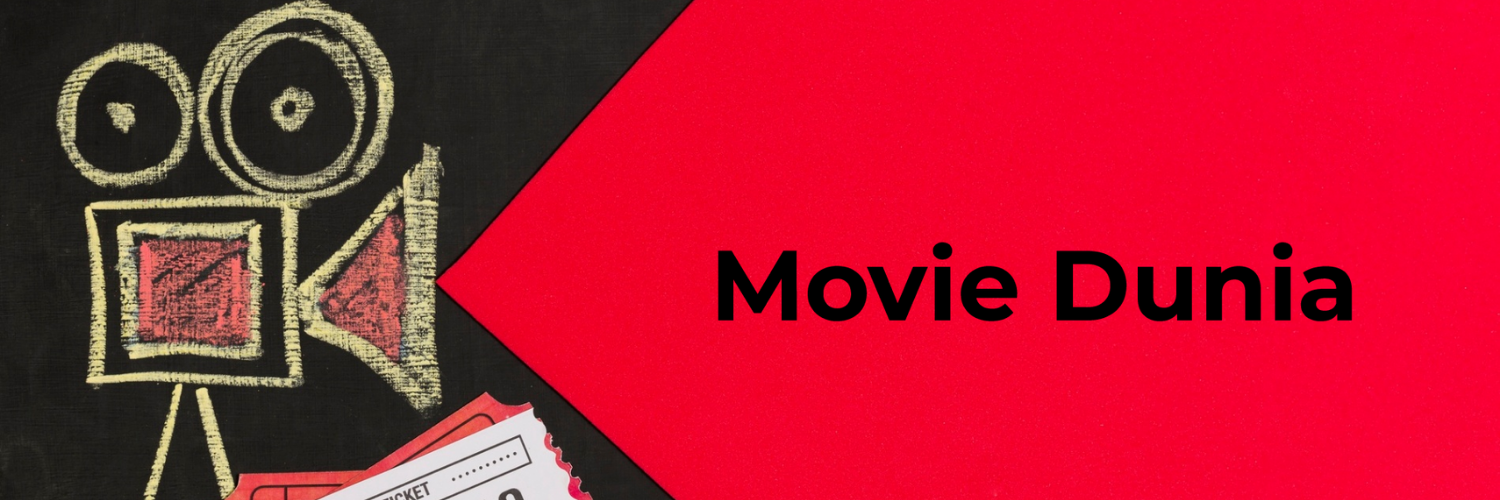

# Movie Dunia
## (Movie Recommendation System)

### Import required libraries

In [67]:
import pandas as pd
import ast
import nltk
from sklearn.metrics.pairwise import cosine_similarity


In [68]:
pip install pandas

In [69]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install ast

  Using cached AST-0.0.2.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\SHUBHANGI DOURBY\AppData\Local\Temp\pip-install-k433q7ah\ast_72a6f3dac2e7483b950d98e36ad76e57\setup.py", line 6, in <module>
          README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
        File "C:\Users\SHUBHANGI DOURBY\AppData\Local\Programs\Python\Python310\lib\codecs.py", line 905, in open
          file = builtins.open(filename, mode, buffering)
      FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SHUBHANGI DOURBY\\AppData\\Local\\Temp\\pip-install-k433q7ah\\ast_72a6f3dac2e7483b950d98e36ad76e57\\AST/README'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: 

In [71]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### Load the Dataset

[Download the Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv)



In [72]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import ast
import nltk
from sklearn.metrics.pairwise import cosine_similarity

In [74]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [75]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [76]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [77]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Merge the datasets on the basis of common attribute 'title'

In [78]:
# merging to dataframes on the basis of common attribute 'title'
movies = movies.merge(credits,on='title')

In [79]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

#### Select Desired Attributes

In [80]:
# genre id keywords title overview cast crew
movies = movies[['genres','movie_id','cast','crew','title','overview','keywords']]

#### Remove NAN values

In [81]:
movies.isnull().sum()

genres      0
movie_id    0
cast        0
crew        0
title       0
overview    3
keywords    0
dtype: int64

In [82]:
movies.dropna(inplace = True)

In [83]:
movies.isnull().sum()

genres      0
movie_id    0
cast        0
crew        0
title       0
overview    0
keywords    0
dtype: int64

In [84]:
movies.duplicated().sum()

0

## Data Cleaning

In [85]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [86]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

# this whole thing is a string and we are converting it List so that we can iterate over it


def convert(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [87]:
movies['genres'] = movies['genres'].apply(convert)

In [88]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[Adventure, Fantasy, Action]",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[Action, Adventure, Crime]",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [89]:
movies['keywords'] = movies['keywords'].apply(convert)

In [90]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel..."


In [91]:
#cast of the 1st movie and we want top 3 cast 
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [92]:
#function for selecting top 3 cast

def convertCast(obj):
    l = []
    c = 0
    for i in ast.literal_eval(obj):
        if c != 3:
            l.append(i['name'])
            c+=1
        else:
            break
    return l

In [93]:
movies['cast'] = movies['cast'].apply(convertCast)

In [94]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]",285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]",49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel..."


In [95]:
# crew of 1st view and we want director's name form this
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [96]:
def get_director(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [97]:
movies['crew'] = movies['crew'].apply(get_director)

In [98]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],Avatar,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]",285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],Spectre,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]",49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],The Dark Knight Rises,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],John Carter,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel..."


In [99]:
# movies overview is a string so we are converting it to a list so that we can concat with other lists

movies['overview'] = movies['overview'].apply(lambda x : x.split())


In [100]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[culture clash, future, space war, space colon..."
1,"[Adventure, Fantasy, Action]",285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drug abuse, exotic island, east india ..."
2,"[Action, Adventure, Crime]",206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, based on novel, secret agent, sequel, mi..."
3,"[Action, Crime, Drama, Thriller]",49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dc comics, crime fighter, terrorist, secret i..."
4,"[Action, Adventure, Science Fiction]",49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[based on novel, mars, medallion, space travel..."


In [101]:
movies['genres'] = movies['genres'].apply(lambda x : [i.replace(" ", "") for i in x])
movies['crew'] = movies['crew'].apply(lambda x : [i.replace(" ", '') for i in x])
movies['cast'] = movies['cast'].apply(lambda x : [i.replace(" ",'') for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x : [i.replace(" ",'') for i in x])

In [102]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ..."
1,"[Adventure, Fantasy, Action]",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad..."
2,"[Action, Adventure, Crime]",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,"[Action, Crime, Drama, Thriller]",49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden..."
4,"[Action, Adventure, ScienceFiction]",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p..."


In [103]:
movies['tags'] = movies['overview'] + movies['cast'] + movies['crew'] + movies['keywords'] + movies['genres']

In [104]:
movies.head()

,genres,movie_id,cast,crew,title,overview,keywords,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]",49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, ScienceFiction]",49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili..."


In [105]:
df = movies[['movie_id','title','tags']]

In [106]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [107]:
df['tags'] = df['tags'].apply(lambda x :" ".join(x))

C:\Users\SHUBHANGI DOURBY\AppData\Local\Temp\ipykernel_25892\1371404646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x :" ".join(x))


In [108]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [109]:
df['tags'] = df['tags'].apply(lambda x : x.lower())

C:\Users\SHUBHANGI DOURBY\AppData\Local\Temp\ipykernel_25892\4152385510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x : x.lower())


In [110]:
df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


### Stemerizing

In [111]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [112]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
        

In [113]:
['loved','loving','love']
['love','love','love']

['love', 'love', 'love']

In [114]:
ps.stem('love')

'love'

In [115]:
df['tags'] = df['tags'].apply(stem)

C:\Users\SHUBHANGI DOURBY\AppData\Local\Temp\ipykernel_25892\866399325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(stem)


### Use Count Vectorizer

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [118]:
# we will get a scipy matrix and we are converting it to a numpy array
vector = cv.fit_transform(df['tags']).toarray()

In [119]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
# to get the name of all the features of vectors
cv.get_feature_names()

c:\Users\SHUBHANGI DOURBY\Desktop\DOCKET\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

### Building similarity matrix

In [121]:
similarity = cosine_similarity(vector)

In [122]:
similarity[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

### Start Recommending

In [123]:
def recommmend(movie):
    movie_index = df[df['title'] == movie].index[0] #masking 
    distance = similarity[movie_index]
    movies_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(df.iloc[i[0]].title)
    return

In [124]:
recommmend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


### Exporting Similarity Matrix

In [125]:
import pickle

In [126]:
pickle.dump(df.to_dict(),open('movies_dict.pkl','wb'))

In [127]:
pickle.dump(similarity,open('similarity.pkl','wb'))